Лабораторная работа №5

Вариант №17

Выполнил Плешко Георгий

5.1.17, 5.4.3, 5.5.3, 5.9.9

In [27]:
from IPython.display import Image
import numpy as np
import scipy.linalg
from numpy.linalg import solve
from scipy.linalg import solve_triangular
from matplotlib import pyplot as plt
%matplotlib inline



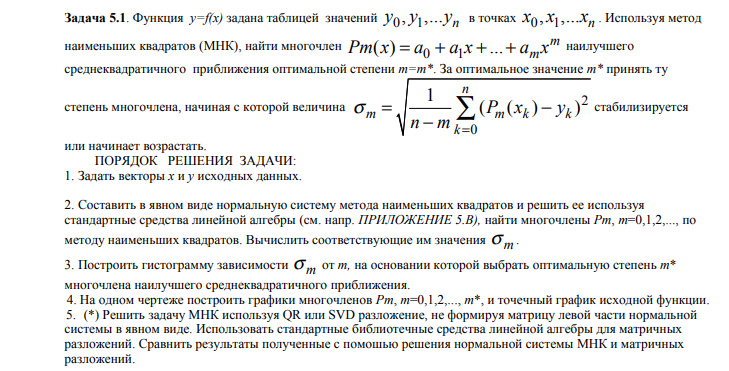

In [15]:
Image("5_1_17.png")

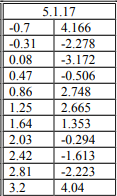

In [16]:
Image("5_1_17_2.png")

[0.44418182]
[0.34814452 0.07682984]
[ 0.36153564 -0.72986402  0.32267754]
[ 0.25021534 -0.88389068  0.61437703 -0.07778653]
[-2.94138348  2.0631214  10.3101555  -8.77745317  1.73993333]
[ -3.046029     2.80396645  10.49282289 -10.12112681   2.51691073
  -0.12431638]
[ -3.02265607   3.05023318  10.15397827 -10.50064407   3.16460178
  -0.39877443   0.03659441]
[ -3.57891803   1.95357281  17.46659236 -12.40965731  -7.1143049
   9.44928773  -3.24478043   0.37501427]
[-3.52787801e+00  1.86490784e+00  1.67115407e+01 -1.12191925e+01
 -6.50117277e+00  7.46231087e+00 -1.92759097e+00  1.42396804e-02
  3.60774587e-02]
[ -3.35498484   0.77209742  14.3567756   -0.53726848 -11.29566866
  -5.40386391  15.32583875  -8.70050205   2.05895382  -0.17981123]
7.112805963636364
7.892144387878789
8.620321512703963
9.833006386946389
0.35044374747474816
0.357729931585086
0.4416274518922228
0.055645642424243025
0.07944190375413844
0.08258155318903417


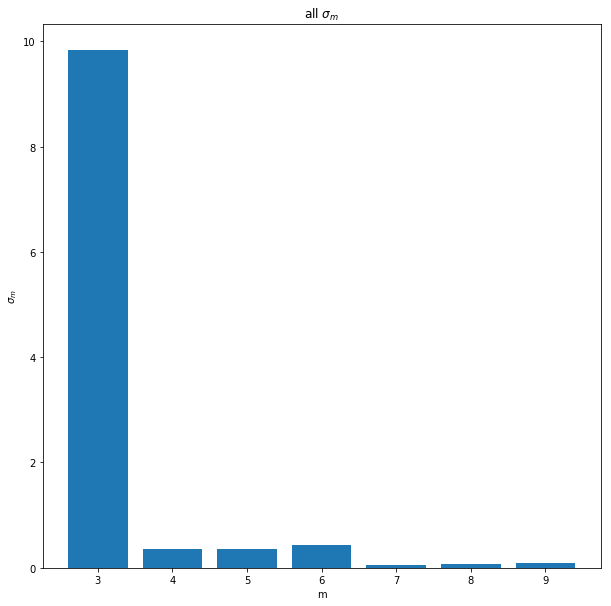

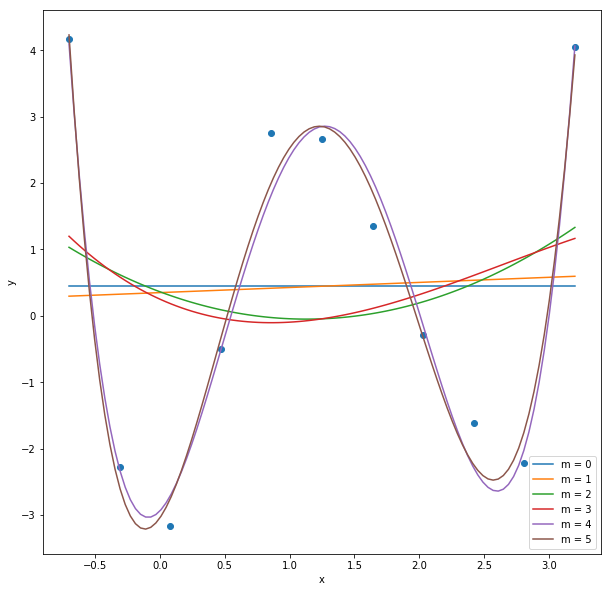

True

In [36]:
#Задание исходных данных
X = np.array([-0.7, -0.31, 0.08, 0.47, 0.86, 1.25,1.64, 2.03, 2.42, 2.81, 3.2])
Y = np.array([4.166, -2.278, -3.172, -0.506, 2.748, 2.665, 1.353, -0.294, -1.613, -2.223, 4.04])

#Метод наименьших квадратов
def mnk(X,Y,m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    return np.linalg.solve(A.T.dot(A), A.T.dot(Y))

#Нахождение многочленов P
def P_m(X,a):
    return [np.sum(x**np.arange(len(a)) * a) for x in X]

#Вычисление сигм
def sigma(X,Y,A):
    return [np.sum((P_m(X, a) - Y)**2) / (X.shape[0] - a.shape[0]) for a in A]

K=np.arange(10)
A=[]
for m in K:
    print(mnk(X,Y,m))
    A.append(mnk(X,Y,m))
    
sigmas = sigma(X, Y, A)
for s in sigmas: 
    print(s)

#Строим гистограмму из пункта 3    
plt.figure(figsize=(10,10))
plt.bar(K[3:], sigmas[3:])
plt.xlabel('m')
plt.ylabel('$\sigma_m$')
plt.title('all $\sigma_m$')
plt.show()

#Графики многочленов P
m_opt=5
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
X_m=np.linspace(min(X), max(X),100)
for m in range(m_opt+1):
    a=mnk(X,Y,m)
    Y_m = P_m_in_point(X_m, a)
    plt.plot(X_m,Y_m,label='m = '+str(m))
plt.legend()
plt.show()

#Решаем МНК,используя QR
def mnk_qr(X, Y, m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    Q, R = np.linalg.qr(A)
    return scipy.linalg.solve_triangular(R, Q.T.dot(Y))

np.allclose(mnk(X, Y, 5), mnk_qr(X, Y, 5))

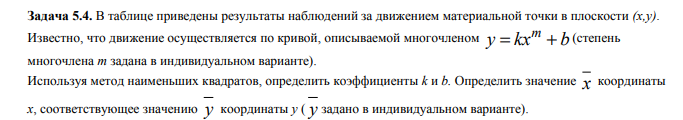

In [18]:
Image("5_4_3.png")

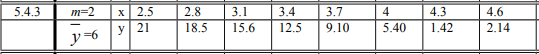

In [19]:
Image("5_4_3_2.png")

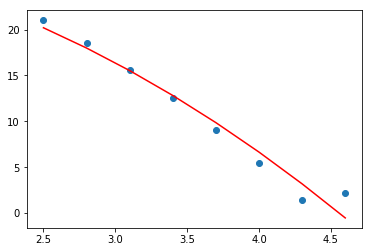

In [38]:
m = 2
y_ = 6
x = np.array([2.5,2.8,3.1,3.4,3.7,4,4.3,4.6])
y = np.array([21,18.5,15.6,12.5,9.1,5.4,1.42,2.14])
x.shape, y.shape

def mnk(x, y):
    P = np.array([x**j for j in [0,2]]).T
    A = np.dot(P.T, P)
    b = np.dot(P.T, y)
    return solve(A, b)[::-1]

coef = mnk(x,y)
k,b = coef

np.sqrt((y_-b)/k)



plt.figure()
plt.scatter(x,y,)
plt.plot(x, k*x**m+b,c='red')

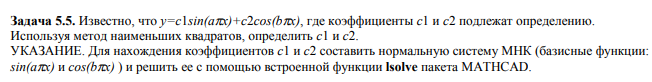

In [20]:
Image("5_5_3.png")

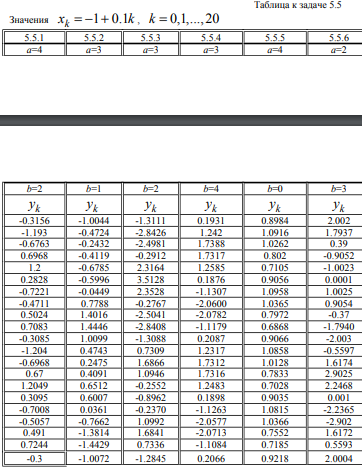

In [22]:
Image("5_.png")

In [8]:
x=np.array([-1+0.1*k for k in range(0,21)])
Y=np.array([-1.3111,-2.8426,-2.4981,-0.2912,2.3164,3.5128,2.3528,-0.2767,-2.5041,-2.8408,-1.3088,0.7309,
           1.6866,1.0946,-0.2552,-0.8962,-0.2370,1.0992,1.6841,0.7336,-1.2845])

a=3
b=2
def f_1(x):
    return np.sin(a*np.pi*x)

def f_2(x):
    return np.cos(b*np.pi*x)


f_s=[f_1,f_2]
A=np.hstack((f_1(x)[:,None],f_2(x)[:,None]))

np.linalg.solve(A.T.dot(A),A.T.dot(Y))

array([ 2.20420807, -1.30181979])